<b>
<p>
<center>
<font size="5">
Popular Machine Learning Methods: Idea, Practice and Math
</font>
</center>
</p>

<p>
<center>
<font size="4">
Part 3, Chapter 2, Section 3: Convolutional Neural Networks
</font>
</center>
</p>
    
<p>
<center>
<font size="4">
Final project
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Yixi Liang
</font>
</center>
</p>
</b>

# Overview

- This notebook includes homework 5 for Convolutional Neural Networks (Part 3, Chapter 2, Section 3).
- See the accompanied slides in our [github repository](https://github.com/yuxiaohuang/teaching/tree/master/gwu/machine_learning_I/spring_2021/slides/p3_deep_learning/p3_c2_supervised_learning/p3_c2_s3_convolutional_neural_networks).
- Here we will work on TensorFlow Dataset [cifar100](https://www.tensorflow.org/datasets/catalog/cifar100).
- The goal of this homework is tweaking the pipeline (including data preprocessing, building, compiling and training DNNs) implemented in [/p3 c2 s3 convolutional_neural_networks/case_study](https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/spring_2021/code/p3_deep_learning/p3_c2_supervised_learning/p3_c2_s3_convolutional_neural_networks/case_study/case_study.ipynb) to make it work for the new dataset mentioned above.
- Complete the missing parts indicated by # Implement me.
- Particularly, the code should
    - be bug-free (note that the output produced by your solution may not necessarily be the same as the provided output, due to version issues)
    - be commented
- **The baseline for this assignment is 0.7. As per the grading rubrics (section 15 of the syllabus), if the test score of your best model is lower than or the same as the baseline, you will only receive 80% of the full mark. See more details in the grading rubrics.**
- Submit an ipynb file named homework_5.ipynb to [blackboard](https://blackboard.gwu.edu) folder /Assignments/Homework_5/.

# Notebook Configuration

In [1]:
abspath_curr = 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project'

# Get the absolute path of the deep utilities folder
abspath_util_deep = 'C:/Users/REX/Desktop/teaching-master/gwu/machine_learning_I/spring_2022/code/utilities/p3_deep_learning'

## TensorFlow

In [2]:
import pandas as pd 
import os 
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
print('Num GPUs Available', len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available 1


In [4]:
tf.test.is_built_with_cuda()

True

## Warning

In [5]:
# import warnings

# # Ignore warnings
# warnings.filterwarnings('ignore')

## Matplotlib

In [6]:
# import matplotlib.pyplot as plt
# %matplotlib inline 

# # Set matplotlib sizes
# plt.rc('font', size=20)
# plt.rc('axes', titlesize=20)
# plt.rc('axes', labelsize=20)
# plt.rc('xtick', labelsize=20)
# plt.rc('ytick', labelsize=20)
# plt.rc('legend', fontsize=20)
# plt.rc('figure', titlesize=20)

## Random seed

In [7]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [8]:
# # Change working directory to the absolute path of the deep utilities folder
# %cd $abspath_util_deep

# # Import the deep utitilities
# %run pmlm_utilities_deep.ipynb

## Loading the data

In this case study, we will work on the [Plant Seedlings Classification](https://www.kaggle.com/competitions/plant-seedlings-classification/overview).

### Creating the directory for the data

In [9]:
train_path = abspath_curr + '/train/'
test_path = abspath_curr + '/test/'

In [10]:
for dirpath, dirnames, filenames in os.walk(abspath_curr): 
     print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 4 directories and 4 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project'.
There are 0 directories and 2 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\.ipynb_checkpoints'.
There are 1 directories and 0 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\result'.
There are 0 directories and 0 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\result\model'.
There are 0 directories and 794 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\test'.
There are 12 directories and 0 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\train'.
There are 0 directories and 263 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\train\Black-grass'.
There are 0 directories and 390 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\train\Charlock'.
There are 0 directories and 287 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\train\Clea

## Load data  

In [11]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_path,
                                                                 label_mode="categorical", 
                                                                 shuffle=True,
                                                                 image_size=(224,224),
                                                                batch_size = 32, 
                                                                 seed=42,
                                                                validation_split=0.2,
                                                                   subset="training")

Found 4750 files belonging to 12 classes.
Using 3800 files for training.


In [12]:
valid_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_path,
                                                                 label_mode="categorical", 
                                                                 shuffle=False,
                                                                 image_size=(1,1),
                                                                batch_size = 32,
                                                                 seed=42,
                                                                validation_split=0.2,
                                                                   subset="validation")

Found 4750 files belonging to 12 classes.
Using 950 files for validation.


In [13]:
class_names = train_data.class_names
class_names

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [14]:
data = train_data.take(1)


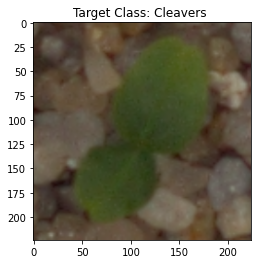

In [15]:
for image, label in data: 
    plt.imshow(image[0]/255.)
    plt.title(f"Target Class: {class_names[tf.argmax(label[0])]} ")

In [16]:
image[0], label[0]

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[108.      , 102.      ,  86.      ],
         [105.828125,  99.51785 ,  84.13839 ],
         [102.046875,  95.19643 ,  80.89732 ],
         ...,
         [109.70088 , 100.252205,  88.401764],
         [108.62053 ,  97.55132 ,  86.24106 ],
         [108.      ,  96.      ,  85.      ]],
 
        [[106.75893 , 100.44866 ,  84.13839 ],
         [104.58705 ,  97.966515,  82.27678 ],
         [100.8058  ,  93.64509 ,  79.03571 ],
         ...,
         [109.70088 , 100.65528 ,  88.80484 ],
         [108.62053 ,  98.2896  ,  86.97933 ],
         [108.      ,  96.9308  ,  85.9308  ]],
 
        [[104.59821 ,  97.747765,  80.89732 ],
         [102.42634 ,  95.26562 ,  79.03571 ],
         [ 98.64509 ,  90.94419 ,  75.79465 ],
         ...,
         [109.70088 , 101.35703 ,  89.50659 ],
         [108.62053 ,  99.574936,  88.26467 ],
         [108.      ,  98.55134 ,  87.55134 ]],
 
        ...,
 
        [[ 75.14956 ,  58.14956 

In [17]:
base_model = tf.keras.applications.EfficientNetB0(include_top= False)

base_model.trainable = False 

inputs = tf.keras.layers.Input(shape=(224,224,3), name='Input_Layer') 

x = base_model(inputs) 

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = tf.keras.layers.Dense(len(class_names), activation='softmax', name='output_layer')(x)

model = tf.keras.Model(inputs, outputs)



In [18]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/model/model.h5',
                                                     save_best_only=True,
                                                     save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                 restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=1)

In [19]:
model.compile(loss='categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), 
             metrics=['accuracy']) 



In [ ]:
model_history = model.fit(train_data, 
                          validation_data= valid_data,
                          epochs=5,
                          callbacks=[model_checkpoint_cb,
                             early_stopping_cb,
                             reduce_lr_on_plateau_cb]
                         )

Epoch 1/5


# Training

## Creating the directory for the model

In [ ]:
# # Make directory
# directory = os.path.dirname(abspath_curr + '/result/model/')
# if not os.path.exists(directory):
#     os.makedirs(directory)

## Building the architecture of the model

In [ ]:
# # Add the pretrained layers
# pretrained_model = keras.applications.EfficientNetB0(include_top=False, weights='imagenet')

# inputs = tf.keras.layers.Input(shape=(224,224,3), name='Input_Layer') 

# # Add GlobalAveragePooling2D layer
# average_pooling = keras.layers.GlobalAveragePooling2D()(pretrained_model.output)

# # Add the output layer
# output = keras.layers.Dense(12, activation='softmax')(average_pooling)

# # Get the model
# model = keras.Model(inputs=inputs, outputs=output)

# model.summary()

In [ ]:
base_model = tf.keras.applications.ResNet50(include_top= False)

base_model.trainable = False 

inputs = tf.keras.layers.Input(shape=(224,224,3), name='Input_Layer') 

x = base_model(inputs) 

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = tf.keras.layers.Dense(len(class_names), activation='softmax', name='output_layer')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(loss='categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(), 
             metrics=['accuracy']) 

model_history = model.fit(data_train, 
                          steps_per_epoch=len(data_train),
                          validation_data= data_valid,
                        validation_steps= len(data_valid),
                         epochs=5
                         )

## Freezing the pretrained layers

In [ ]:
# # For each layer in the pretrained model
# for layer in pretrained_model.layers:
#     # Freeze the layer
#     layer.trainable = False

## Setting Callbacks

In [ ]:
# # ModelCheckpoint callback
# model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/model/model.h5',
#                                                      save_best_only=True,
#                                                      save_weights_only=True)

# # EarlyStopping callback
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
#                                                  restore_best_weights=True)

# # ReduceLROnPlateau callback
# reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
#                                                             patience=1)

## Compiling the model
Here we use the default learning rate of Adam optimizer.

In [ ]:
# # Compile the model
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

## Training the model

In [ ]:
# # Train, evaluate and save the best model
# history = model.fit(data_train,
#                    epochs=5,
#                    validation_data=data_valid,
#                    callbacks=[model_checkpoint_cb,
#                              early_stopping_cb,
#                              reduce_lr_on_plateau_cb])

## Plotting the learning curve

### Creating the directory for the figure

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:
import pandas as pd

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8,5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_before_unfreezing.pdf')
plt.show()

## Unfreezing the pretrained layers

In [ ]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Unfreeze the layer
    layer.trainable = True

## Compiling the model
Here we use a lower learning rate (by a factor of 10) of Adam optimizer, so that it is less likely to compromise the pretrained weights.

In [ ]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [ ]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=10,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

## Plotting the learning curve

In [ ]:
# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_after_unfreezing.pdf')
plt.show()

# Testing

In [ ]:
## Shuffling, batching and prefetching the data

# Shuffling the training data
data_train = data_train.shuffle(buffer_size=1000, seed=random_seed)

# Set the batch size
batch_size = 16

# Batch and prefetch the training data
data_train = data_train.batch(batch_size).prefetch(1)

# Batch and prefetch the validation data
data_valid = data_valid.batch(batch_size).prefetch(1)

# Batch and prefetch the test data
data_test = data_test.batch(batch_size).prefetch(1)

# Training

## Creating the directory for the model

# Make directory
directory = os.path.dirname(abspath_curr + '/result/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Building the architecture of the model

# Add the pretrained layers
pretrained_model = keras.applications.EfficientNetV2B2(include_top=False, weights='imagenet')

# Add GlobalAveragePooling2D layer
average_pooling = keras.layers.GlobalAveragePooling2D()(pretrained_model.output)

# Add the output layer
output = keras.layers.Dense(n_classes, activation='softmax')(average_pooling)

# Get the model
model = keras.Model(inputs=pretrained_model.input, outputs=output)

model.summary()

## Freezing the pretrained layers

# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Freeze the layer
    layer.trainable = False

## Setting Callbacks

# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/model/model.h5',
                                                     save_best_only=True,
                                                     save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                 restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=1)

## Compiling the model
Here we use the default learning rate of Adam optimizer.

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## Training the model

# Train, evaluate and save the best model
history = model.fit(data_train,
                   epochs=5,
                   validation_data=data_valid,
                   callbacks=[model_checkpoint_cb,
                             early_stopping_cb,
                             reduce_lr_on_plateau_cb])

## Plotting the learning curve

### Creating the directory for the figure

# Make directory
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

import pandas as pd

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8,5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_before_unfreezing.pdf')
plt.show()

## Unfreezing the pretrained layers

# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Unfreeze the layer
    layer.trainable = True

## Compiling the model
Here we use a lower learning rate (by a factor of 10) of Adam optimizer, so that it is less likely to compromise the pretrained weights.

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=10,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

## Plotting the learning curve

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_after_unfreezing.pdf')
plt.show()

# Testing